Now we have some days of data, lets do some trend analysis

# Load Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
%matplotlib inline

# Load data
load data from 11.14 to 12.11

In [59]:
# load data list
with open('list_1211.list') as f:
    datalist = f.read().splitlines()

In [86]:
def data_clean(df):
    # price drop nan, should only contain numbers, drop the record if not.
    temp = df[~df['price'].isnull()]
    df = temp[temp['price'].str.replace(",","").str.isdigit()].reset_index(drop=True)
    # reformat some features
    df['price'] = df['price'].str.replace(",","").astype(float)
    # some price is not reasonable, drop them
    df = df.loc[df['price'] > 140,].reset_index(drop=True)
    df['suburb'] = df['address'].str.rsplit(',',1,expand=True)[1].str.strip()
    df['bond'] = df['bond'].str.split('$',expand=True)[1].str.replace(',','').astype(float)
    df['agent_suburb'] = df['agent_brand'].str.split('-',expand=True)[1]
    df['agent_brand'] = df['agent_brand'].str.split('-',expand=True)[0]
    df['agent_brand'] = df['agent_brand'].str.strip()
    temp = df['agent_name'].str.split(':',expand=True)
    replace = temp.loc[temp[0].str.lower() == 'agent',]
    old = temp.loc[temp[0].str.lower() != 'agent',]
    replace[0] = replace[1]
    df['agent_name'] = pd.concat([old,replace]).sort_index()[0]
    return df

In [87]:
merge_df = pd.DataFrame()
for data in datalist:
    with open(data) as f:
        df = pd.read_csv(f)
        # special treatment for 12-02
        if data == '02_12_2019_rentals_raw.csv':
            dfa = df.iloc[1607:2164]
            dfb = df.iloc[4082:]
            df = pd.concat([dfa,dfb])
        #    print(df.shape)
        df_clean = data_clean(df)
        #print(df_clean.shape)
        # add display date
        df_clean['time_month'] = pd.to_datetime(data[:10],format = '%d_%m_%Y').month
        df_clean['time_day'] = pd.to_datetime(data[:10],format = '%d_%m_%Y').day
        df_clean['time_dayofweek'] = pd.to_datetime(data[:10],format = '%d_%m_%Y').dayofweek
        df_clean['timestamp'] = pd.to_datetime(data[:10],format = '%d_%m_%Y')
        merge_df = merge_df.append(df_clean)
        del df_clean
        del df
        print("finished merging",data)

/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 01_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 02_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 03_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 04_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 05_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 06_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 07_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 08_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 09_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 10_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 11_12_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 14_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 15_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 16_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 17_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 18_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 19_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 20_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 21_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 22_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 23_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 24_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 25_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 26_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 27_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 28_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


finished merging 29_11_2019_rentals_raw.csv
finished merging 30_11_2019_rentals_raw.csv


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# EDA
now we have 63000 records for data analysis

## number of records trend

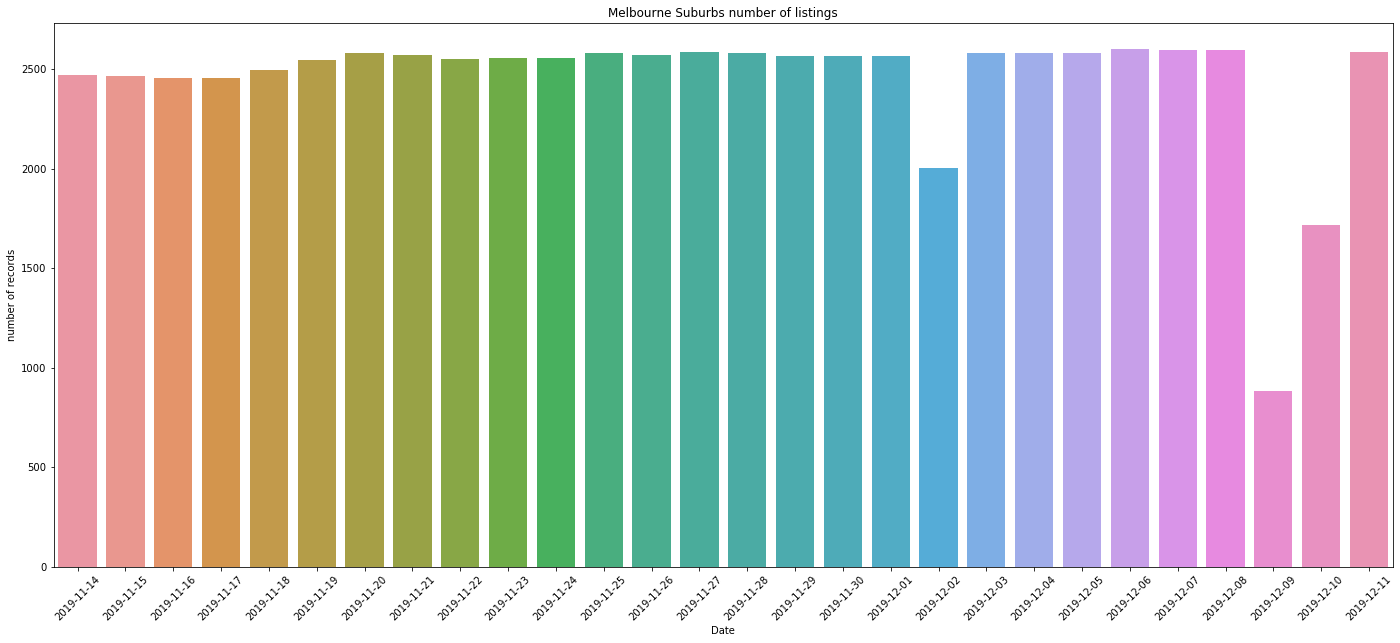

In [88]:
def plot_num_of_rds(merge_df):
    import matplotlib.dates as mdates
    plot_data = merge_df.groupby('timestamp').count().price.to_frame()
    sns.set_color_codes("pastel")
    fig,ax = plt.subplots(figsize=(24,10))
    ax = sns.barplot(plot_data.index.strftime('%Y-%m-%d'),plot_data.price)
    ax.set(xlabel="Date",ylabel="number of records",title="Melbourne Suburbs number of listings")
    ax.xaxis.set_tick_params(rotation=45) 
    
    
plot_num_of_rds(merge_df)

+ ok we do observed some anomalies 12-02, 12-09, 12-10 probably have problems
+ but overall the trend seems quite stendy.

## new listings per day and records rent out

In [147]:
def plot_listing_variantion(merge_df):
    df_newlisting = pd.DataFrame()
    df_rentout = pd.DataFrame()
    for today in merge_df['timestamp'].sort_values().dt.date.unique():
        try:
            nextday = (today + pd.DateOffset(hours=24)).date()
            print(nextday)
            temp1 = merge_df.loc[merge_df['timestamp'] == pd.Timestamp(today),['price','address']]
            temp2 = merge_df.loc[merge_df['timestamp'] == pd.Timestamp(nextday),['price','address']]
            temp1['cate'] = 1
            temp2['cate'] = 2
            temp3 = pd.concat([temp1, temp2]) # concat dataframes
            temp3 = temp3.reset_index(drop=True) # reset the index
            temp3_gpby = temp3.groupby(['price','address']) #group by
            idx = [x[0] for x in temp3_gpby.groups.values() if len(x) == 1] #reindex
            temp3 = temp3.iloc[idx]
            nextday_newlisting = temp3.loc[temp3.cate == 2]
            nextday_newlisting['date'] = nextday
            nextday_rentout = temp3.loc[temp3.cate == 1]
            nextday_rentout['date'] = nextday
            df_newlisting = df_newlisting.append(nextday_newlisting)
            df_rentout = df_rentout.append(nextday_rentout)
        except:
            break
    return df_newlisting,df_rentout

df_newlisting,df_rentout = plot_listing_variantion(merge_df)

2019-11-15


/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2019-11-16
2019-11-17
2019-11-18
2019-11-19
2019-11-20
2019-11-21
2019-11-22
2019-11-23
2019-11-24
2019-11-25
2019-11-26
2019-11-27
2019-11-28
2019-11-29
2019-11-30
2019-12-01
2019-12-02
2019-12-03
2019-12-04
2019-12-05
2019-12-06
2019-12-07
2019-12-08
2019-12-09
2019-12-10
2019-12-11
2019-12-12


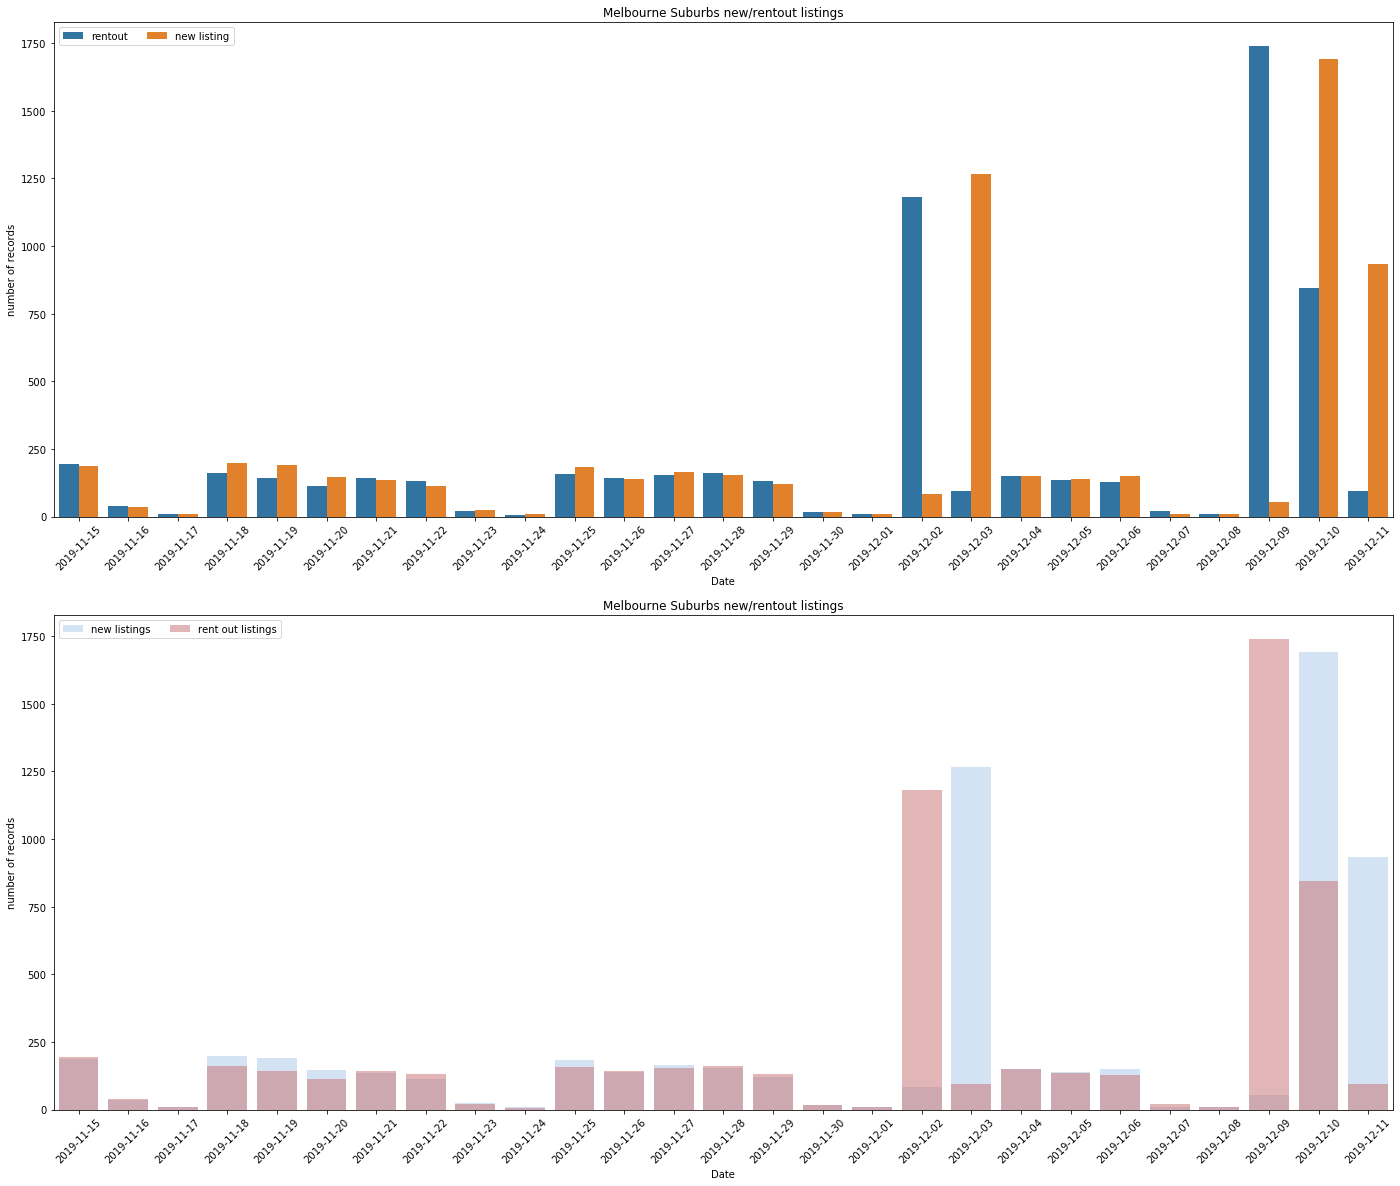

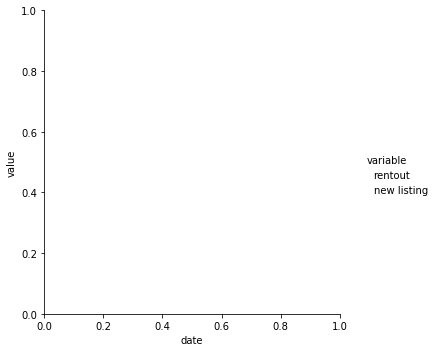

In [203]:
def plot_variation(df_newlisting,df_rentout):
    plotdata_new = df_newlisting.groupby('date').count().price
    plotdata_out= df_rentout.groupby('date').count()[:-1].price
    merge = pd.merge(df_rentout.groupby('date').count()[:-1].price,df_newlisting.groupby('date').count().price,on='date').reset_index()
    merge = merge.rename(columns={'price_x':'rentout','price_y':'new listing'})
    sns.set_color_codes("pastel")
    fig,ax = plt.subplots(2,1,figsize=(24,20))
    sns.barplot(plotdata_new.index,plotdata_new.values,label="new listings",color='b',alpha=0.5,ax = ax[1])
    sns.set_color_codes("muted")
    sns.barplot(plotdata_out.index,plotdata_out.values,label="rent out listings",color='r',alpha=0.5,ax = ax[1])
    ax[1].set(xlabel="Date",ylabel="number of records",title="Melbourne Suburbs new/rentout listings")
    ax[1].xaxis.set_tick_params(rotation=45) 
    ax[1].legend(ncol=2, loc="upper left", frameon=True)
    sns.set_color_codes("pastel")
    sns.catplot(x='date',y='value',hue='variable',data = merge.melt(id_vars='date'),ax = ax[0],kind='bar')
    ax[0].set(xlabel="Date",ylabel="number of records",title="Melbourne Suburbs new/rentout listings")
    ax[0].xaxis.set_tick_params(rotation=45) 
    ax[0].legend(ncol=2, loc="upper left", frameon=True)
    
plot_variation(df_newlisting,df_rentout) 

+ seems saturday and sunday most of the agencies don't work
+ Monday has more changes than the rest of other days in a week
+ numbers of new listings and number of rent outs are, similiar. interesting.

## well, then how long it takes for apartments to be rent out?

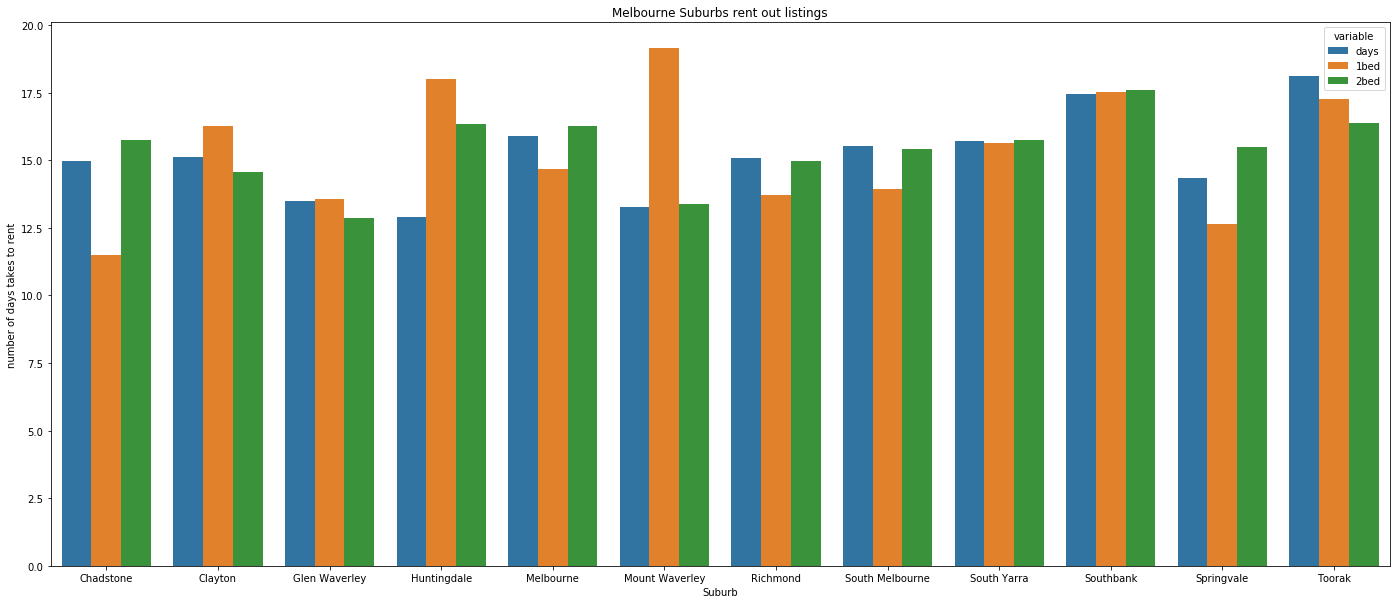

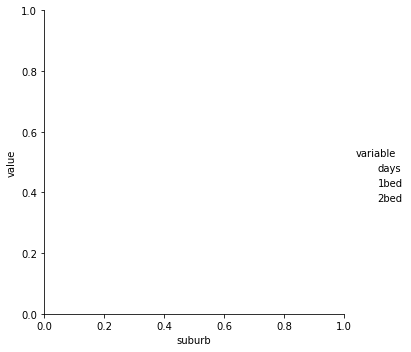

In [238]:
def plot_rentout(merge_df):
    # average rent out time for all properties for each suburb
    temp = merge_df.groupby(['suburb','address']).count().price.to_frame()
    plotdata1 = temp.groupby('suburb').mean().sort_values(by='suburb').rename(columns={'price':'days'})
    # averge rent out time for 1 bedrooms
    temp = merge_df.loc[merge_df['feature_bedroom'] == 1,].groupby(['suburb','address']).count().price.to_frame()
    plotdata1['1bed'] = temp.groupby('suburb').mean().sort_values(by='suburb').rename(columns={'price':'days'}).days
    # averge rent out time for 2 bedrooms
    temp = merge_df.loc[merge_df['feature_bedroom'] == 2,].groupby(['suburb','address']).count().price.to_frame()
    plotdata1['2bed']  = temp.groupby('suburb').mean().sort_values(by='suburb').rename(columns={'price':'days'}).days
    plotorder = plotdata1.index
    sns.set_color_codes("pastel")
    fig,ax = plt.subplots(1,1,figsize=(24,10))
    sns.catplot(x='suburb',y='value',hue='variable',data = plotdata1.reset_index().melt(id_vars='suburb'),kind='bar',ax = ax)
    ax.set(xlabel="Suburb",ylabel="number of days takes to rent",title="Melbourne Suburbs rent out listings")

plot_rentout(merge_df)  

+ Melbourne's apartment do rent out very fast...
+ glen waveley is quite competitive for all kinds of rentings.


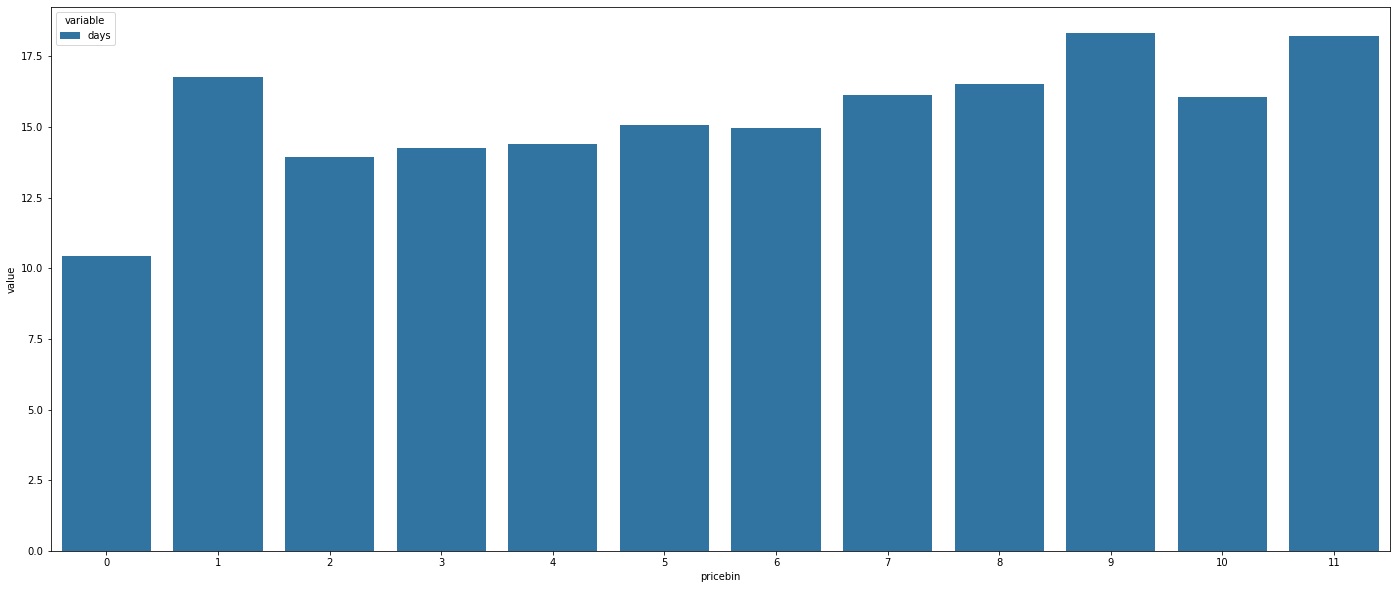

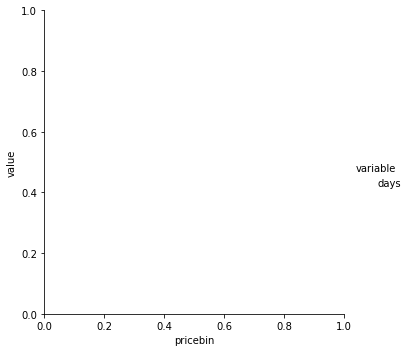

In [263]:

def plot_rentout_price(merge_df):
    merge_df['pricebin'] = np.digitize(merge_df.price,bins = np.linspace(200,1200,11))
    temp = merge_df.groupby(['pricebin','address']).count().price.to_frame()
    plotdata1 = temp.groupby('pricebin').mean().sort_values(by='pricebin').rename(columns={'price':'days'})
    sns.set_color_codes("pastel")
    fig,ax = plt.subplots(1,1,figsize=(24,10))
    sns.catplot(x='pricebin',y='value',hue='variable',data = plotdata1.reset_index().melt(id_vars='pricebin'),kind='bar',ax = ax)

plot_rentout_price(merge_df) 
    

+ seems like cheap apartments (200-300) rent out very fast
+ expensive apartments take longer time to rent